# LightScope

LightScope is the product of the [NASA Space Apps Challenge 2025](https://www.spaceappschallenge.org/2025/challenges/a-world-away-hunting-for-exoplanets-with-ai/) created by a team in Honolulu, Hawaii


## Team Members
__Curt Dodds__

__Miranda Hawarden-Ogata__


## References
The following sources were used to produce this work:

1 - [Using Kepler Data to Plot a Light Curve notebook](https://spacetelescope.github.io/notebooks/notebooks/MAST/Kepler/Kepler_Lightcurve/kepler_lightcurve.html), __Author: Josie Bunnell, STScI SASP Intern__
2 -

In [1]:
#%matplotlib notebook
%matplotlib inline
import os
import requests
import matplotlib.pyplot as plt
import pandas as pd

from astropy.io import fits
from astropy.table import Table

# Sample some Kepler data from our dataset website

Download each fits file in the manifest to the data directory.

In [2]:
import requests

def download_file(url, saveas):
    """
    Downloads a file from a given URL and saves it locally.

    Args:
        url (str): The URL of the file to download.
        saveas (str): The path and filename to save the downloaded file.
    """
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes

        with open(saveas, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"File downloaded successfully to {saveas}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")



In [3]:
kepid = '010797460'
target = f'kplr{kepid}'
datadir = 'data'
os.makedirs(datadir, exist_ok=True)
base_url = 'http://dtn-itc.ifa.hawaii.edu/exoplt/kepler'

In [4]:
obstimes = [
    '2009166043257',
    '2009259160929',
    '2009350155506',
    '2010078095331',
    '2010174085026',
    '2010265121752',
    '2010355172524',
    '2011073133259',
    '2011177032512',
    '2011271113734',
    '2012004120508',
    '2012088054726',
    '2012179063303',
    '2012277125453',
    '2013011073258',
    '2013098041711',
    '2013131215648',
]

In [5]:
for o in obstimes:
  timestamp = o
  fitsfile = f'{target}-{timestamp}_llc.fits'
  download_file(url=f'{base_url}/{fitsfile}', saveas=f'{datadir}/{fitsfile}')

File downloaded successfully to data/kplr010797460-2009166043257_llc.fits
File downloaded successfully to data/kplr010797460-2009259160929_llc.fits
File downloaded successfully to data/kplr010797460-2009350155506_llc.fits
File downloaded successfully to data/kplr010797460-2010078095331_llc.fits
File downloaded successfully to data/kplr010797460-2010174085026_llc.fits
File downloaded successfully to data/kplr010797460-2010265121752_llc.fits
File downloaded successfully to data/kplr010797460-2010355172524_llc.fits
File downloaded successfully to data/kplr010797460-2011073133259_llc.fits
File downloaded successfully to data/kplr010797460-2011177032512_llc.fits
File downloaded successfully to data/kplr010797460-2011271113734_llc.fits
File downloaded successfully to data/kplr010797460-2012004120508_llc.fits
File downloaded successfully to data/kplr010797460-2012088054726_llc.fits
File downloaded successfully to data/kplr010797460-2012179063303_llc.fits
File downloaded successfully to data/k

In [6]:
fits_file = 'data/kplr010797460-2013131215648_llc.fits'
hdul = fits.open(fits_file)
hdul.info()


Filename: data/kplr010797460-2013131215648_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   1556R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (5, 4)   int32   


In [7]:
data = hdul[1].data
image_data = hdul[0].data

df = pd.DataFrame(data)
df.head()

,TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,SAP_QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
0,1559.226082,-0.000822,70976,8337.280273,4.404322,824.057190,0.404555,NaN,NaN,0,NaN,NaN,NaN,NaN,963.495178,0.000813,845.955842,0.000875,0.014511,0.018758
1,1559.246516,-0.000821,70977,8333.589844,4.403589,829.072083,0.403246,10799.235352,5.604109,0,NaN,NaN,NaN,NaN,963.495093,0.000813,845.956076,0.000875,0.014465,0.018770
2,1559.266950,-0.000821,70978,8347.298828,4.404603,830.001038,0.403172,10816.287109,5.605401,0,NaN,NaN,NaN,NaN,963.493028,0.000812,845.956583,0.000874,0.014546,0.018722
3,1559.287384,-0.000820,70979,8334.277344,4.404209,829.688721,0.402322,10797.660156,5.615751,128,NaN,NaN,NaN,NaN,963.492795,0.000813,845.956378,0.000876,0.014290,0.018647
4,1559.307818,-0.000820,70980,8351.571289,4.404988,832.004578,0.402669,10822.209961,5.614833,0,NaN,NaN,NaN,NaN,963.495957,0.000811,845.954903,0.000873,0.014335,0.018517


List all of the FITS headers

In [8]:
# Get the header section
header = hdul[0].header
# Iterate through all keywords and values
for key, value in header.items():
    print(f"{key}: {value}")

SIMPLE: True
BITPIX: 8
NAXIS: 0
EXTEND: True
NEXTEND: 2
EXTNAME: PRIMARY
EXTVER: 1
ORIGIN: NASA/Ames
DATE: 2015-10-22
CREATOR: 1070864 FluxExporter2PipelineModule
PROCVER: svn+ssh://murzim/repo/soc/tags/release/9.3.33 r60543
FILEVER: 6.1
TIMVERSN: OGIP/93-003
TELESCOP: Kepler
INSTRUME: Kepler Photometer
OBJECT: KIC 10797460
KEPLERID: 10797460
CHANNEL: 58
SKYGROUP: 18
MODULE: 17
OUTPUT: 2
QUARTER: 17
SEASON: 3
DATA_REL: 25
OBSMODE: long cadence
MISSION: Kepler
TTABLEID: 68
RADESYS: ICRS
RA_OBJ: 291.93423
DEC_OBJ: 48.14165
EQUINOX: 2000.0
PMRA: 0.0
PMDEC: 0.0
PMTOTAL: 0.0
PARALLAX: None
GLON: 80.102268
GLAT: 14.237782
GMAG: 15.89
RMAG: 15.27
IMAG: 15.114
ZMAG: 15.006
D51MAG: 15.636
JMAG: 14.082
HMAG: 13.75
KMAG: 13.647
KEPMAG: 15.347
GRCOLOR: 0.62
JKCOLOR: 0.435
GKCOLOR: 2.243
TEFF: 5850
LOGG: 4.426
FEH: 0.14
EBMINUSV: 0.142
AV: 0.441
RADIUS: 1.04
TMINDEX: 312153317
SCPID: None
CHECKSUM: 79MIA8JI98JIA8JI


Now get headers from the Light Curve data section

In [9]:
# Get the header section
header = hdul[1].header
# Iterate through all keywords and values
for key, value in header.items():
    print(f"{key}: {value}")

XTENSION: BINTABLE
BITPIX: 8
NAXIS: 2
NAXIS1: 100
NAXIS2: 1556
PCOUNT: 0
GCOUNT: 1
TFIELDS: 20
TTYPE1: TIME
TFORM1: D
TUNIT1: BJD - 2454833
TDISP1: D14.7
TTYPE2: TIMECORR
TFORM2: E
TUNIT2: d
TDISP2: E13.6
TTYPE3: CADENCENO
TFORM3: J
TDISP3: I10
TTYPE4: SAP_FLUX
TFORM4: E
TUNIT4: e-/s
TDISP4: E14.7
TTYPE5: SAP_FLUX_ERR
TFORM5: E
TUNIT5: e-/s
TDISP5: E14.7
TTYPE6: SAP_BKG
TFORM6: E
TUNIT6: e-/s
TDISP6: E14.7
TTYPE7: SAP_BKG_ERR
TFORM7: E
TUNIT7: e-/s
TDISP7: E14.7
TTYPE8: PDCSAP_FLUX
TFORM8: E
TUNIT8: e-/s
TDISP8: E14.7
TTYPE9: PDCSAP_FLUX_ERR
TFORM9: E
TUNIT9: e-/s
TDISP9: E14.7
TTYPE10: SAP_QUALITY
TFORM10: J
TDISP10: B16.16
TTYPE11: PSF_CENTR1
TFORM11: D
TUNIT11: pixel
TDISP11: F10.5
TTYPE12: PSF_CENTR1_ERR
TFORM12: E
TUNIT12: pixel
TDISP12: E14.7
TTYPE13: PSF_CENTR2
TFORM13: D
TUNIT13: pixel
TDISP13: F10.5
TTYPE14: PSF_CENTR2_ERR
TFORM14: E
TUNIT14: pixel
TDISP14: E14.7
TTYPE15: MOM_CENTR1
TFORM15: D
TUNIT15: pixel
TDISP15: F10.5
TTYPE16: MOM_CENTR1_ERR
TFORM16: E
TUNIT16: pixel
TDIS

# Table data
We can see from NAXIS=2 that hdul[1].data is a 2D table with NAXIS1=100 rows and NAXIS2=1639 columns.

In [10]:
binaryext = hdul[1].data

binarytable = Table(binaryext)
binarytable[1:5]

TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,SAP_QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
float64,float32,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1559.2465161698565,-0.00082145014,70977,8333.59,4.4035892,829.0721,0.40324575,10799.235,5.604109,0,nan,nan,nan,nan,963.4950932783844,0.0008126546,845.9560758026621,0.0008750097,0.014465432,0.01876984
1559.2669502652643,-0.00082095474,70978,8347.299,4.4046035,830.00104,0.4031715,10816.287,5.605401,0,nan,nan,nan,nan,963.4930279797511,0.00081197335,845.9565832602112,0.0008743328,0.014545662,0.018722055
1559.2873844608403,-0.00082045916,70979,8334.277,4.4042087,829.6887,0.40232164,10797.66,5.6157513,128,nan,nan,nan,nan,963.4927951571934,0.00081334595,845.9563780685526,0.00087578816,0.0142902015,0.018647185
1559.3078184565966,-0.0008199634,70980,8351.571,4.404988,832.0046,0.40266898,10822.21,5.614833,0,nan,nan,nan,nan,963.4959573261583,0.0008113831,845.9549034851038,0.0008732921,0.01433482,0.018516934


# Plot a light curve
Let's plot the table

First we transform the data in the fits file into 3 numpy arrays, one for the X axis (time) and 2 plots of flux, one uncorrected and one corrected.

In [11]:
def GetArrays(fitsheader, fitsdata):
    # Read in the "BJDREF" which is the time offset of the time array.
    bjdrefi = fitsheader['BJDREFI']
    bjdreff = fitsheader['BJDREFF']

    # Read in the columns of data.
    times = fitsdata['time']
    uncorr_flux = fitsdata['SAP_FLUX']
    corr_flux = fitsdata['PDCSAP_FLUX']
    # Convert the time array to full BJD by adding the offset back in.
    obstime = times + bjdrefi + bjdreff
    return obstime, uncorr_flux, corr_flux

Now we can plot the light curve

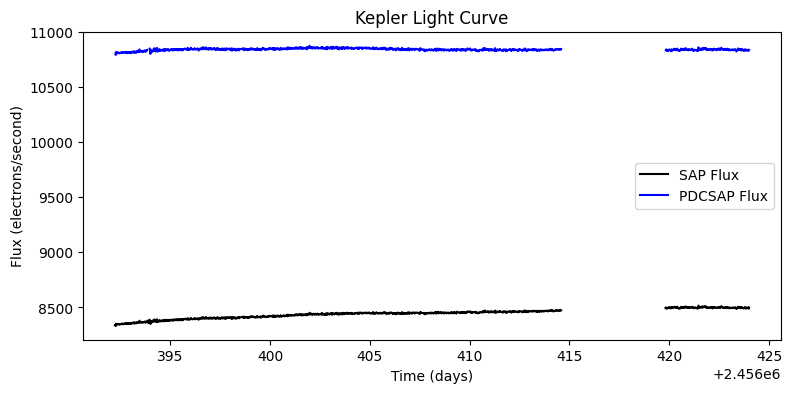

In [12]:
x, y1, y2 = GetArrays(hdul[1].header, hdul[1].data)
plt.figure(figsize=(9,4))

# Plot the time, uncorrected and corrected fluxes.
plt.plot(x, y1, '-k', label='SAP Flux')
plt.plot(x, y2, '-b', label='PDCSAP Flux')

plt.title('Kepler Light Curve')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Flux (electrons/second)')
plt.show()

# Data Reduction

A note about uncorrected and corrected flux. This is taken from the [Kepler Archive Manual](https://archive.stsci.edu/kepler/manuals/archive_manual.pdf#page=20) on page 20:


> The primary purpose of the Presearch Data Conditioning (PDC) module of the Kepler data processing
pipeline is the removal of signatures in the light curves that are correlated with systematic error sources
from the telescope and spacecraft, such as pointing drift, focus changes, and thermal transients. In most
cases PDC achieves its goal of removing these errors while preserving planet transits and other
astrophysically interesting signals. To do this, PDC uses a Bayesian Maximum A Posteriori (MAP)
approach to establish a range of “reasonable” robust fit parameters. These robust fit parameters are then
used to generate a “Bayesian Prior” and a “Bayesian Posterior” probability distribution function which,
when maximized, finds the best fit that simultaneously removes systematic effects reducing the
signal distortion and noise injection that commonly afflicts simple Least Squares (LS) fitting.




# Prepare a training dataset

Our strategy is to sample Kepler long cadence (llc.fits) light curves as 64hr chunks and label the chunks as 1 (planet) or 0 (no planet). Each chunk will be plotted and saved as an image in png format. The keplid number and 1 or 0 will be written to a csv file.

# Exploration Samples
Here are some samples for data exploration.
- 000757450: High S/N
- 010797460: Low S/N

# ETL process to transform fits files into a tensorflow tf.dataset
This process transforms a fits file containing a light curve into X (light curve plot image) and Y (keplid and 1/0 planet/notplanet) training examples in Tensorflow tf.dataset format.

In [13]:
url = 'http://dtn-itc.ifa.hawaii.edu/exoplt/kepler/kepler_catalog.csv'
catalog = 'kepler_catalog.csv'
download_file(url, catalog)
url = 'http://dtn-itc.ifa.hawaii.edu/exoplt/kepler/kepler_manifest.csv'
manifest = 'kepler_manifest.csv'
download_file(url, manifest)

File downloaded successfully to kepler_catalog.csv
File downloaded successfully to kepler_manifest.csv


In [14]:
!grep -v '^#' kepler_catalog.csv >kepler.csv

In [15]:

koidf = pd.read_csv('kepler.csv')
koidf.head()

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_srad,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,35.8,1.0,5455.0,0.927,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,25.8,2.0,5455.0,0.927,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,76.3,1.0,5853.0,0.868,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,505.6,1.0,5805.0,0.791,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,40.9,1.0,6031.0,1.046,288.75488,48.226200,15.509


# Generate a file manifest for the available data that we downloaded

In [16]:
def find_fits_files(directory, pattern='*_llc.fits'):
  """
  Walks through a directory and finds files matching a given pattern.

  Args:
    directory (str): The root directory to start walking from.
    pattern (str): The file pattern to match.

  Returns:
    list: A list of paths to the matching files.
  """
  matching_files = []
  for root, _, files in os.walk(directory):
    for file in files:
      if file.endswith(pattern[1:]): # Simple endswith check for this pattern
        #matching_files.append(os.path.join(root, file))
        matching_files.append(file)
  return matching_files

In [17]:

# Test the function
fits_directory = 'data'
os.makedirs('data', exist_ok=True)
fits_files = find_fits_files(fits_directory)
print(f"Found {len(fits_files)} matching files:")
manifest_file = 'manifest.csv'
with open(manifest_file, 'w') as f:
  f.write("kepid,kepobs,kepfits\n")
  for fname in fits_files:
    kepid = fname.split('-')[0][4:]
    kepobs = fname.split('-')[1][:13]
    kepfits = fname
    f.write(f"{kepid},{kepobs},{kepfits}\n")


Found 17 matching files:


# Manifest
We now have a [manifest](manifest.csv) that we can use to create our training dataset.

Now we need a function to read the manifest file and, for each fits file, merge the fits file with each unique exoplanet transit duration from the KOI catalog for that kepler id.

In [18]:
manidf = pd.read_csv('manifest.csv')
manidf.head()

,kepid,kepobs,kepfits
0,10797460,2009166043257,kplr010797460-2009166043257_llc.fits
1,10797460,2009259160929,kplr010797460-2009259160929_llc.fits
2,10797460,2009350155506,kplr010797460-2009350155506_llc.fits
3,10797460,2010078095331,kplr010797460-2010078095331_llc.fits
4,10797460,2010174085026,kplr010797460-2010174085026_llc.fits


In [19]:
from KeplerETL import KeplerETL, TrainingSet


os.makedirs('tfdata', exist_ok=True)
etl = KeplerETL('data', 'tfdata', koidf, manidf)

2025-10-05 21:23:23.376611: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
etl.manifest.describe()

,kepid,koi_period,kepobs
count,34.0,34.000000,3.400000e+01
mean,10797460.0,31.953209,2.011174e+12
std,0.0,22.803015,1.334870e+09
min,10797460.0,9.488036,2.009166e+12
25%,10797460.0,9.488036,2.010174e+12
50%,10797460.0,31.953209,2.011177e+12
75%,10797460.0,54.418383,2.012179e+12
max,10797460.0,54.418383,2.013131e+12


In [21]:
# Load/Prepare the training examples
etl.OpenDataset()

tfdata/train_0.tfr 0
tfdata/valid_0.tfr 0
tfdata/test_0.tfr 0


In [22]:
# Write the training examples to the 'train' directory
etl.Load(TrainingSet.TRAIN)
etl.SaveDataset(TrainingSet.TRAIN, TrainingSet.TRAIN)

Loaded 30 examples
Saving 30 manifest entries
Chunkify: 17 chunks of len 256
17 TrainingExamples for kplr010797460-2010078095331_llc.fits
Serializing example 0 chunk 0
Serializing example 0 chunk 1
Serializing example 0 chunk 2
Serializing example 0 chunk 3
Serializing example 0 chunk 4
Serializing example 0 chunk 5
Serializing example 0 chunk 6
Serializing example 0 chunk 7
Serializing example 0 chunk 8
Serializing example 0 chunk 9
Serializing example 0 chunk 10
Serializing example 0 chunk 11
Serializing example 0 chunk 12
Serializing example 0 chunk 13
Serializing example 0 chunk 14
Serializing example 0 chunk 15
Serializing example 0 chunk 16
Saving training example 0 with 17 chunks
Saving training example chunk 0
Saving training example chunk 1
Saving training example chunk 2
Saving training example chunk 3
Saving training example chunk 4
Saving training example chunk 5
Saving training example chunk 6
Saving training example chunk 7
Saving training example chunk 8
Saving training 

Chunkify: 17 chunks of len 256
17 TrainingExamples for kplr010797460-2009350155506_llc.fits
Serializing example 7 chunk 0
Serializing example 7 chunk 1
Serializing example 7 chunk 2
Serializing example 7 chunk 3
Serializing example 7 chunk 4
Serializing example 7 chunk 5
Serializing example 7 chunk 6
Serializing example 7 chunk 7
Serializing example 7 chunk 8
Serializing example 7 chunk 9
Serializing example 7 chunk 10
Serializing example 7 chunk 11
Serializing example 7 chunk 12
Serializing example 7 chunk 13
Serializing example 7 chunk 14
Serializing example 7 chunk 15
Serializing example 7 chunk 16
Saving training example 7 with 17 chunks
Saving training example chunk 0
Saving training example chunk 1
Saving training example chunk 2
Saving training example chunk 3
Saving training example chunk 4
Saving training example chunk 5
Saving training example chunk 6
Saving training example chunk 7
Saving training example chunk 8
Saving training example chunk 9
Saving training example chunk 

Serializing example 16 chunk 11
Serializing example 16 chunk 12
Serializing example 16 chunk 13
Serializing example 16 chunk 14
Serializing example 16 chunk 15
Serializing example 16 chunk 16
Saving training example 16 with 17 chunks
Saving training example chunk 0
Saving training example chunk 1
Saving training example chunk 2
Saving training example chunk 3
Saving training example chunk 4
Saving training example chunk 5
Saving training example chunk 6
Saving training example chunk 7
Saving training example chunk 8
Saving training example chunk 9
Saving training example chunk 10
Saving training example chunk 11
Saving training example chunk 12
Saving training example chunk 13
Saving training example chunk 14
Saving training example chunk 15
Saving training example chunk 16
Chunkify: 6 chunks of len 256
6 TrainingExamples for kplr010797460-2009166043257_llc.fits
Serializing example 17 chunk 0
Serializing example 17 chunk 1
Serializing example 17 chunk 2
Serializing example 17 chunk 3
S

Saving training example 24 with 18 chunks
Saving training example chunk 0
Saving training example chunk 1
Saving training example chunk 2
Saving training example chunk 3
Saving training example chunk 4
Saving training example chunk 5
Saving training example chunk 6
Saving training example chunk 7
Saving training example chunk 8
Saving training example chunk 9
Saving training example chunk 10
Saving training example chunk 11
Saving training example chunk 12
Saving training example chunk 13
Saving training example chunk 14
Saving training example chunk 15
Saving training example chunk 16
Saving training example chunk 17
Chunkify: 17 chunks of len 256
17 TrainingExamples for kplr010797460-2009350155506_llc.fits
Serializing example 25 chunk 0
Serializing example 25 chunk 1
Serializing example 25 chunk 2
Serializing example 25 chunk 3
Serializing example 25 chunk 4
Serializing example 25 chunk 5
Serializing example 25 chunk 6
Serializing example 25 chunk 7
Serializing example 25 chunk 8
Ser

In [23]:
etl.Load(TrainingSet.VALID)
etl.SaveDataset(TrainingSet.VALID, TrainingSet.VALID)

Loaded 2 examples
Saving 2 manifest entries
Chunkify: 6 chunks of len 256
6 TrainingExamples for kplr010797460-2013131215648_llc.fits
Serializing example 0 chunk 0
Serializing example 0 chunk 1
Serializing example 0 chunk 2
Serializing example 0 chunk 3
Serializing example 0 chunk 4
Serializing example 0 chunk 5
Saving training example 0 with 6 chunks
Saving training example chunk 0
Saving training example chunk 1
Saving training example chunk 2
Saving training example chunk 3
Saving training example chunk 4
Saving training example chunk 5
Chunkify: 18 chunks of len 256
18 TrainingExamples for kplr010797460-2012277125453_llc.fits
Serializing example 1 chunk 0
Serializing example 1 chunk 1
Serializing example 1 chunk 2
Serializing example 1 chunk 3
Serializing example 1 chunk 4
Serializing example 1 chunk 5
Serializing example 1 chunk 6
Serializing example 1 chunk 7
Serializing example 1 chunk 8
Serializing example 1 chunk 9
Serializing example 1 chunk 10
Serializing example 1 chunk 11


In [24]:
!ls -l tfdata

total 2032
-rw-r--r-- 1 root root      0 Oct  5 21:23 test_0.tfr
-rw-r--r-- 1 root root 999424 Oct  5 21:23 train_0.tfr
-rw-r--r-- 1 root root  49152 Oct  5 21:23 valid_0.tfr
